# Electricity prices - as timeseries analysis

In [1]:
import os
print(f'Current working dir:\t {os.getcwd()}')
from pathlib import Path

from datetime import datetime
# from datetime import timedelta

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import torch

%matplotlib widget

Current working dir:	 c:\GitRepos\various-data-analysis\electricity-prices


In [2]:
filename = Path("Rocni_zprava_o_trhu_2020_V0.csv")
root_data = Path("D:/DATA_FAST/electricity")
# read only header first for prep on parsing and stuff
cols_from_header = pd.read_csv(root_data / filename, nrows=0).columns.tolist()
# # parse_dates = ['begins_at', 'ends_at', 'created_at', 'updated_at', 'expired_at', 'paid_at']
# # data_raw = pd.read_csv(filename, index_col='id', parse_dates=parse_dates).drop(columns=['payment_id'])
data_raw = pd.read_csv(root_data / filename, parse_dates=['Den']) #.drop(columns=['payment_id'])
data_raw = data_raw.dropna()
data_raw


,Den,Hodina,CZK/MWh
0,2020-01-01,1,843.61
1,2020-01-01,2,772.46
2,2020-01-01,3,724.95
3,2020-01-01,4,695.47
4,2020-01-01,5,670.32
...,...,...,...
8779,2020-12-31,20,1389.41
8780,2020-12-31,21,1324.32
8781,2020-12-31,22,1267.90
8782,2020-12-31,23,1252.41


In [3]:
df = pd.DataFrame()
df['date'] = pd.to_datetime(data_raw['Den'])
df['date'] += pd.to_timedelta(data_raw['Hodina'], unit='h')
df['month'] = data_raw['Den'].apply(lambda date: date.month)
df['hour'] = data_raw['Hodina']
df['price'] = data_raw['CZK/MWh']
df.set_index('date')
df.describe()

,month,hour,price
count,8784.000000,8784.000000,8784.000000
mean,6.514458,12.500114,886.549812
std,3.451427,6.922778,421.834926
min,1.000000,1.000000,-1768.650000
25%,4.000000,6.750000,628.167500
50%,7.000000,12.500000,862.140000
75%,10.000000,18.250000,1120.280000
max,12.000000,25.000000,3378.950000


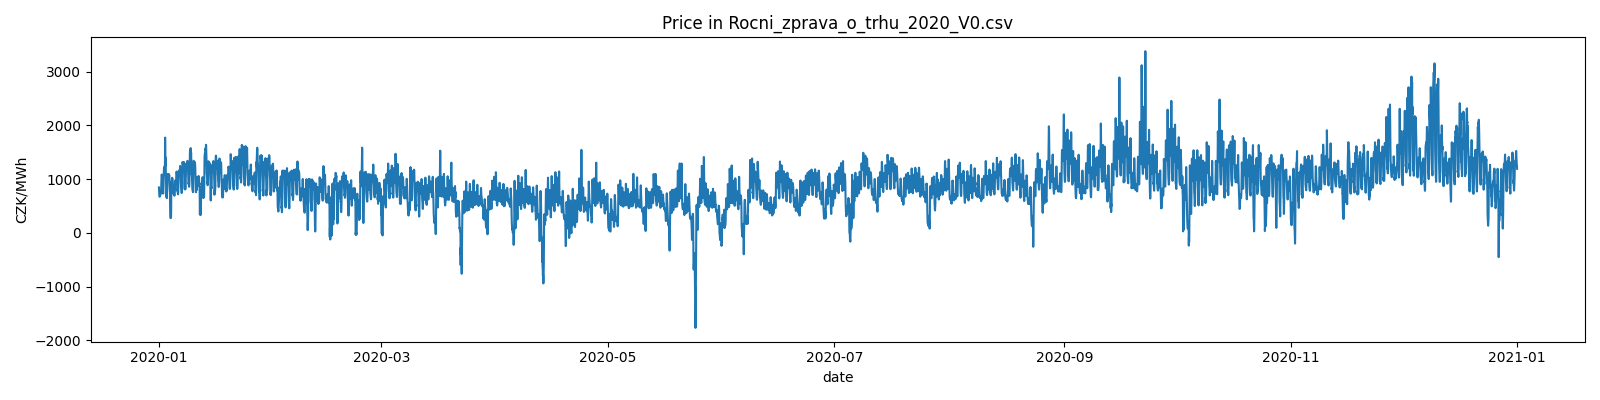

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
sns.lineplot(data=df, x='date', y='price')
ax.set_title(f'Price in {filename}')
ax.set_ylabel('CZK/MWh')
fig.tight_layout()

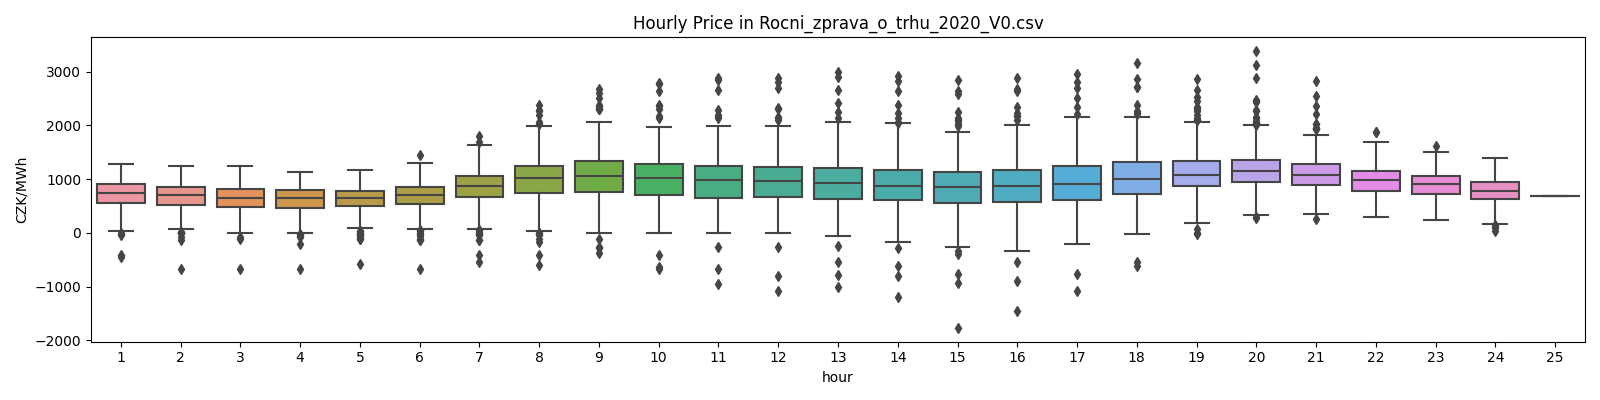

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
sns.boxplot(data=df, x='hour', y='price')
ax.set_title(f'Hourly Price in {filename}')
ax.set_ylabel('CZK/MWh')
fig.tight_layout()

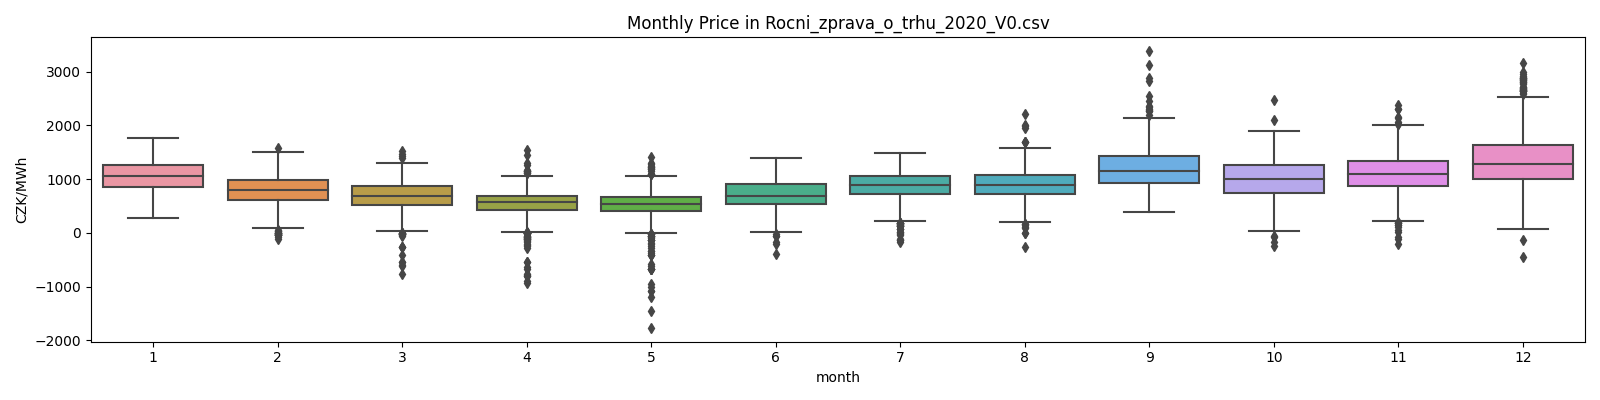

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
sns.boxplot(data=df, x='month', y='price')
ax.set_title(f'Monthly Price in {filename}')
ax.set_ylabel('CZK/MWh')
fig.tight_layout()

In [6]:
capacity = 12.6 * 0.8  # kWh
pricedif = 0.7  # CZK/kWh
repeatsperday = 2

equipment_price = 172000 - 126000  # CZK
breakeven_days = equipment_price/(capacity * pricedif * repeatsperday)
print(f'Breakeven in {breakeven_days/365:.1f} years')

Breakeven in 8.9 years
